## Normality Tests
Shapiro-Wilk Test
D’Agostino’s K^2 Test
Anderson-Darling Test
## Correlation Tests
Pearson’s Correlation Coefficient
Spearman’s Rank Correlation
Kendall’s Rank Correlation
Chi-Squared Test
## Stationary Tests
Augmented Dickey-Fuller
Kwiatkowski-Phillips-Schmidt-Shin
## Parametric Statistical Hypothesis Tests
Student’s t-test
Paired Student’s t-test
Analysis of Variance Test (ANOVA)
Repeated Measures ANOVA Test
## Nonparametric Statistical Hypothesis Tests
Mann-Whitney U Test
Wilcoxon Signed-Rank Test
Kruskal-Wallis H Test
Friedman Test

# Normality  Test
This section lists statistical tests that you can use to check if your data has a Gaussian distribution.


# Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.


* Assumptions

Observations in each sample are independent and identically distributed (iid).
* Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

0.8951009511947632 0.19340917468070984
probably Gussian


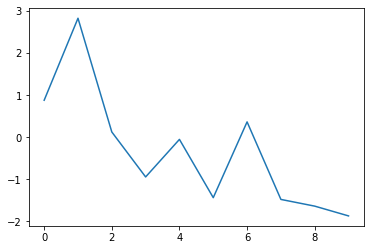

In [12]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt


data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stat, p = shapiro(data)

print(stat,p)

if p > 0.05:
    print('probably Gussian')
else:
    print(" Probabliy not Gussian")

plt.plot(list(range(len(data))),data)

# D’Agostino’s K^2 Test

In [14]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


# Anderson-Darling Test

In [17]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# 2. Correlation Tests
This section lists statistical tests that you can use to check if two samples are related.

# Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

* Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples

In [20]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


# Spearman’s Rank Correlation

# endall’s Rank Correlation
Tests whether two samples have a monotonic relationship( size of one variable increases as the other variables also increases, or where the size of one variable increases as the other variable also decreases).

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
* Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.

In [22]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


In [23]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


# Chi-Squared Test
Tests whether two categorical variables are related or independent.

* Assumptions

Observations used in the calculation of the contingency table are independent.
25 or more examples in each cell of the contingency table.
* Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.

In [41]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


# 3. Stationary Tests
This section lists statistical tests that you can use to check if a time series is stationary or not.

# Augmented Dickey-Fuller Unit Root Test
Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

* Assumptions

Observations in are temporally ordered.
* Interpretation

H0: a unit root is present (series is non-stationary).
H1: a unit root is not present (series is stationary).

In [29]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
d = [1,2,3,1,2,3,1,2,3]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.992, p=0.994
Probably not Stationary


# Kwiatkowski-Phillips-Schmidt-Shin
Tests whether a time series is trend stationary or not.

* Assumptions

Observations in are temporally ordered.
* Interpretation

H0: the time series is not trend-stationary.
H1: the time series is trend-stationary.

In [39]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


C:\Users\ADITYA\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


# 4. Parametric Statistical Hypothesis Tests
This section lists statistical tests that you can use to compare data samples.

# Student’s t-test
Tests whether the means of two independent samples are significantly different.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

* Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [38]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


In [37]:
import numpy as np
np.mean(data1),np.mean(data2)

(-0.32489999999999997, -0.15209999999999996)

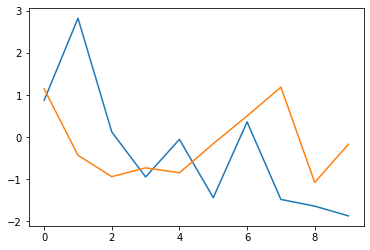

In [42]:
plt.plot(list(range(len(data1))),data1)
plt.plot(list(range(len(data2))),data2)

# Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.
* Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [43]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


# Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
* Interpretation

H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.

In [45]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


# 5. Nonparametric Statistical Hypothesis Tests

# Mann-Whitney U Test
Tests whether the distributions of two independent samples are equal or not.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
* Interpretation

H0: the distributions of both samples are equal.
H1: the distributions of both samples are not equal.

In [47]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


# Wilcoxon Signed-Rank Test
Tests whether the distributions of two paired samples are equal or not.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.
* Interpretation

H0: the distributions of both samples are equal.
H1: the distributions of both samples are not equal.

In [48]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


# Kruskal-Wallis H Test
Tests whether the distributions of two or more independent samples are equal or not.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
* Interpretation

H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.

In [50]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


# Friedman Test
Tests whether the distributions of two or more paired samples are equal or not.

* Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.
* Interpretation

H0: the distributions of all samples are equal.
H1: the distributions of one or more samples are not equal.

In [52]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
